In [1]:
import math
import operator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve

In [2]:
from utils import *
from quantizeRGB import quantizeRGB
from quantizeHSV import quantizeHSV
from computeQuantizationError import computeQuantizationError
from getHueHists import getHueHists
from detectCircles import detectCircles

In [3]:
%load_ext autoreload
%autoreload 2

In [10]:
# load image
rgb_fish = load_image('fish.jpg')
show(rgb_fish)

In [12]:
# 2.1.a
segmented_rgb_fish, mean_colors = quantizeRGB(rgb_fish, 5)
show(segmented_rgb_fish)

In [15]:
# 2.1.b
segmented_hsv_fish, mean_hues = quantizeHSV(rgb_fish, 5)
show(segmented_hsv_fish)

In [16]:
# 2.1.c
quantized_error = computeQuantizationError(rgb_fish, segmented_rgb_fish)

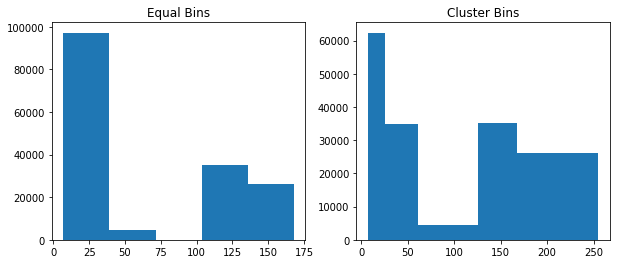

In [17]:
# 2.1.d
hist_eq, hist_cl = getHueHists(rgb_fish, 5)

In [34]:
#im = load_image('jupiter.jpg')
im = load_image('egg.jpg')
show(im)

In [5]:
np.arange()

In [57]:
#rs = [13, 32, 50, 110]
rs = [7, 8, 9, 10, 11, 12]
centers = []
min_val = 100
max_val = 200

output = im.copy()

for r in rs:
    
    H, tracker = detectCircles(im, r, True, 0.05, 2, min_val, max_val)
    sorted_H = sorted(H.items(), key=operator.itemgetter(1))
    max_votes = sorted_H[-1][1]
    centers += [c[0] for c in sorted_H if c[1]>=max_votes-3]
    #a, b, r = sorted_H[-1][0]
    #a, b, r = (108, 456, 50)
    #centers.append((a, b, r))
    
    
for a, b, r, in centers:
    cv2.circle(output, (a, b), r, (0, 255, 0), 4)  
cv2.imshow("output", np.hstack([output, im]))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
gray_im = rgb2gray(im)
canny_edges = cv2.Canny(gray_im, min_val, max_val)
show(canny_edges)

In [46]:
max_votes = sorted_H[-1][1]

In [52]:
centers += [c[0] for c in sorted_H if c[1]>=max_votes-3]

In [53]:
centers

[(60, 92, 7),
 (130, 174, 8),
 (128, 158, 9),
 (146, 160, 10),
 (122, 158, 11),
 (122, 156, 12),
 (130, 152, 12),
 (148, 162, 12),
 (146, 164, 12),
 (124, 160, 12),
 (134, 176, 12),
 (128, 180, 12),
 (114, 162, 12),
 (124, 182, 12),
 (128, 154, 12),
 (126, 158, 12),
 (120, 158, 12),
 (116, 160, 12),
 (124, 154, 12),
 (128, 150, 12),
 (126, 152, 12),
 (122, 156, 12)]

In [47]:
circles = [c[0] for c in sorted_H if c[1]>=max_votes-3]

[(130, 152, 12),
 (148, 162, 12),
 (146, 164, 12),
 (124, 160, 12),
 (134, 176, 12),
 (128, 180, 12),
 (114, 162, 12),
 (124, 182, 12),
 (128, 154, 12),
 (126, 158, 12),
 (120, 158, 12),
 (116, 160, 12),
 (124, 154, 12),
 (128, 150, 12),
 (126, 152, 12),
 (122, 156, 12)]

In [49]:
sorted_H[-20:]

[((130, 178, 12), 15),
 ((120, 184, 12), 15),
 ((110, 164, 12), 15),
 ((106, 166, 12), 15),
 ((130, 152, 12), 16),
 ((148, 162, 12), 16),
 ((146, 164, 12), 16),
 ((124, 160, 12), 16),
 ((134, 176, 12), 16),
 ((128, 180, 12), 16),
 ((114, 162, 12), 16),
 ((124, 182, 12), 16),
 ((128, 154, 12), 17),
 ((126, 158, 12), 17),
 ((120, 158, 12), 17),
 ((116, 160, 12), 17),
 ((124, 154, 12), 18),
 ((128, 150, 12), 19),
 ((126, 152, 12), 19),
 ((122, 156, 12), 19)]

In [231]:
H, tracker = detectCircles(jupiter, r, False)

In [232]:
sorted_H = sorted(H.items(), key=operator.itemgetter(1))
sorted_H[-50:]

[((138, 90, 110), 21),
 ((-21, 147, 110), 21),
 ((66, 213, 110), 21),
 ((-3, 168, 110), 21),
 ((-24, 171, 110), 21),
 ((-15, 171, 110), 21),
 ((90, 222, 110), 21),
 ((126, 114, 110), 21),
 ((3, 117, 110), 21),
 ((186, 231, 110), 21),
 ((180, 246, 110), 21),
 ((105, 270, 110), 21),
 ((153, 108, 110), 21),
 ((201, 144, 110), 22),
 ((69, 57, 110), 22),
 ((123, 132, 110), 22),
 ((180, 108, 110), 22),
 ((174, 111, 110), 22),
 ((183, 111, 110), 22),
 ((-12, 147, 110), 22),
 ((186, 114, 110), 22),
 ((87, 51, 110), 23),
 ((174, 162, 110), 23),
 ((126, 120, 110), 23),
 ((177, 108, 110), 23),
 ((186, 111, 110), 23),
 ((156, 96, 110), 23),
 ((135, 258, 110), 23),
 ((153, 105, 110), 23),
 ((201, 153, 110), 24),
 ((141, 105, 110), 24),
 ((-39, 138, 110), 24),
 ((48, 216, 110), 24),
 ((-9, 186, 110), 24),
 ((129, 117, 110), 24),
 ((-15, 204, 110), 24),
 ((81, 63, 110), 25),
 ((-15, 186, 110), 25),
 ((126, 117, 110), 25),
 ((90, 63, 110), 26),
 ((162, 105, 110), 26),
 ((-12, 186, 110), 27),
 ((162, 2

In [233]:
idx = -1

In [234]:
sorted_H[idx][0]

(123, 126, 110)

In [235]:
tracker[sorted_H[idx][0]]

[(187, 37),
 (187, 38),
 (188, 38),
 (189, 38),
 (200, 47),
 (200, 48),
 (201, 48),
 (201, 49),
 (202, 49),
 (211, 60),
 (212, 60),
 (212, 61),
 (213, 61),
 (213, 62),
 (222, 75),
 (222, 76),
 (229, 91),
 (232, 108),
 (232, 108),
 (232, 109),
 (232, 109),
 (232, 110),
 (232, 110),
 (232, 142),
 (232, 143),
 (232, 144),
 (220, 175),
 (221, 175),
 (213, 191),
 (213, 192),
 (202, 203),
 (46, 204),
 (201, 204),
 (202, 204),
 (44, 205),
 (45, 205),
 (200, 205),
 (201, 205)]

In [236]:
a, b, r = sorted_H[idx][0]

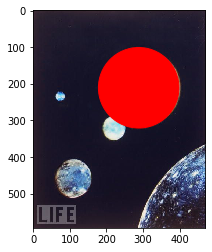

In [237]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(jupiter)

circle = plt.Circle((165+a, 85+b), r, color='red')
ax.add_patch(circle)

In [216]:
circle = plt.Circle((a, b), r) 

In [37]:
output = jupiter.copy()
circles = cv2.HoughCircles(jupiter_gray, cv2.HOUGH_GRADIENT, 1.1, 150)
 
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        #cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # show the output image
    cv2.imshow("output", np.hstack([jupiter, output]))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

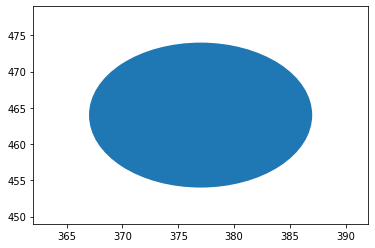

In [173]:
ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((a-15, a+15))
ax.set_ylim((b-15, b+15))

ax.add_artist(circle)

In [133]:
dy[y, x], dx[y, x]

(0, 0)

In [134]:
theta

nan

[((308, 9, 10), 1),
 ((309, -6, 10), 1),
 ((307, 10, 10), 1),
 ((311, -6, 10), 1),
 ((304, -1, 10), 1),
 ((306, 7, 10), 1),
 ((68, 25, 10), 1),
 ((70, 30, 10), 1),
 ((70, 25, 10), 1),
 ((72, 34, 10), 1),
 ((70, 26, 10), 1),
 ((387, 33, 10), 1),
 ((391, 35, 10), 1),
 ((393, 16, 10), 1),
 ((389, 19, 10), 1),
 ((75, 17, 10), 1),
 ((76, 17, 10), 1),
 ((70, 27, 10), 1),
 ((384, 30, 10), 1),
 ((389, 20, 10), 1),
 ((391, 18, 10), 1),
 ((388, 20, 10), 1),
 ((392, 18, 10), 1),
 ((388, 32, 10), 1),
 ((91, 48, 10), 1),
 ((95, 51, 10), 1),
 ((92, 42, 10), 1),
 ((92, 50, 10), 1),
 ((92, 39, 10), 1),
 ((93, 37, 10), 1),
 ((97, 35, 10), 1),
 ((92, 49, 10), 1),
 ((338, 111, 10), 1),
 ((344, 110, 10), 1),
 ((343, 110, 10), 1),
 ((346, 110, 10), 1),
 ((341, 114, 10), 1),
 ((304, 111, 10), 1),
 ((304, 130, 10), 1),
 ((303, 130, 10), 1),
 ((307, 111, 10), 1),
 ((306, 111, 10), 1),
 ((309, 130, 10), 1),
 ((346, 111, 10), 1),
 ((346, 112, 10), 1),
 ((300, 131, 10), 1),
 ((299, 128, 10), 1),
 ((304, 115, 10)

In [74]:
theta = math.atan(dy[y, x] / dx[y, x])

In [97]:
a = np.round(x - r * math.cos(theta), 3)
b = np.round(y + r * math.sin(theta), 3)
a, b

(308.146, 9.282)

In [80]:
H[(a, b)] = 1

In [83]:
H.get((a, b))

1